In [1]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import re
from PIL import Image
import os
from matplotlib.pyplot import figure

from skimage.io import imread
from skimage.io.collection import alphanumeric_key
from dask import delayed
import dask.array as da
#import pycudadecon
#import napari
#from naparimovie import Movie
from functools import partial

import zarr
import dask

In [3]:
base_folder = r'\\10.245.74.40\Turing3\Pu\Aire\DNAFISH08062021'

In [4]:
folders = [os.path.join(base_folder, _fd) for _fd in os.listdir(base_folder)
           if _fd[0] in 'DHP']

In [5]:
folders

['\\\\10.245.74.40\\Turing3\\Pu\\Aire\\DNAFISH08062021\\DAPI',
 '\\\\10.245.74.40\\Turing3\\Pu\\Aire\\DNAFISH08062021\\Hyb0',
 '\\\\10.245.74.40\\Turing3\\Pu\\Aire\\DNAFISH08062021\\Hyb1',
 '\\\\10.245.74.40\\Turing3\\Pu\\Aire\\DNAFISH08062021\\Hyb10',
 '\\\\10.245.74.40\\Turing3\\Pu\\Aire\\DNAFISH08062021\\Hyb11',
 '\\\\10.245.74.40\\Turing3\\Pu\\Aire\\DNAFISH08062021\\Hyb12',
 '\\\\10.245.74.40\\Turing3\\Pu\\Aire\\DNAFISH08062021\\Hyb13',
 '\\\\10.245.74.40\\Turing3\\Pu\\Aire\\DNAFISH08062021\\Hyb15',
 '\\\\10.245.74.40\\Turing3\\Pu\\Aire\\DNAFISH08062021\\Hyb16',
 '\\\\10.245.74.40\\Turing3\\Pu\\Aire\\DNAFISH08062021\\Hyb17',
 '\\\\10.245.74.40\\Turing3\\Pu\\Aire\\DNAFISH08062021\\Hyb18',
 '\\\\10.245.74.40\\Turing3\\Pu\\Aire\\DNAFISH08062021\\Hyb19',
 '\\\\10.245.74.40\\Turing3\\Pu\\Aire\\DNAFISH08062021\\Hyb2',
 '\\\\10.245.74.40\\Turing3\\Pu\\Aire\\DNAFISH08062021\\Hyb20',
 '\\\\10.245.74.40\\Turing3\\Pu\\Aire\\DNAFISH08062021\\Hyb21',
 '\\\\10.245.74.40\\Turing3\\Pu\\Aire\\DNAFI

In [20]:
sel_folder = folders[2]
image_names = [_fd for _fd in os.listdir(sel_folder) if _fd.split(os.extsep)[-1]=='zarr']
fov_names = [_nm.split(os.extsep)[0].split('_')[1] for _nm in image_names]
image_channel = np.unique([_nm.split(os.extsep)[0].split('_')[0] for _nm in image_names])

In [69]:
image_channel

array(['488', '647', '750'], dtype='<U3')

In [71]:
sel_fov = fov_names[1]
raw_ims = []
deskewed_ims = []

for sel_channel in image_channel:
    zarr_path = os.path.join(sel_folder, f"{sel_channel}_{sel_fov}.zarr")
    print(zarr_path)
    zarr_handle = zarr.open(zarr_path, mode='r')
    
    deskewed_ims.append(np.array(zarr_handle[sel_fov]['data_deskewed']))
    raw_ims.append(np.array(zarr_handle[sel_fov]['data']))




\\10.245.74.40\Turing3\Pu\Aire\DNAFISH08062021\Hyb1\488_001.zarr
\\10.245.74.40\Turing3\Pu\Aire\DNAFISH08062021\Hyb1\647_001.zarr
\\10.245.74.40\Turing3\Pu\Aire\DNAFISH08062021\Hyb1\750_001.zarr


<IPython.core.display.Javascript object>


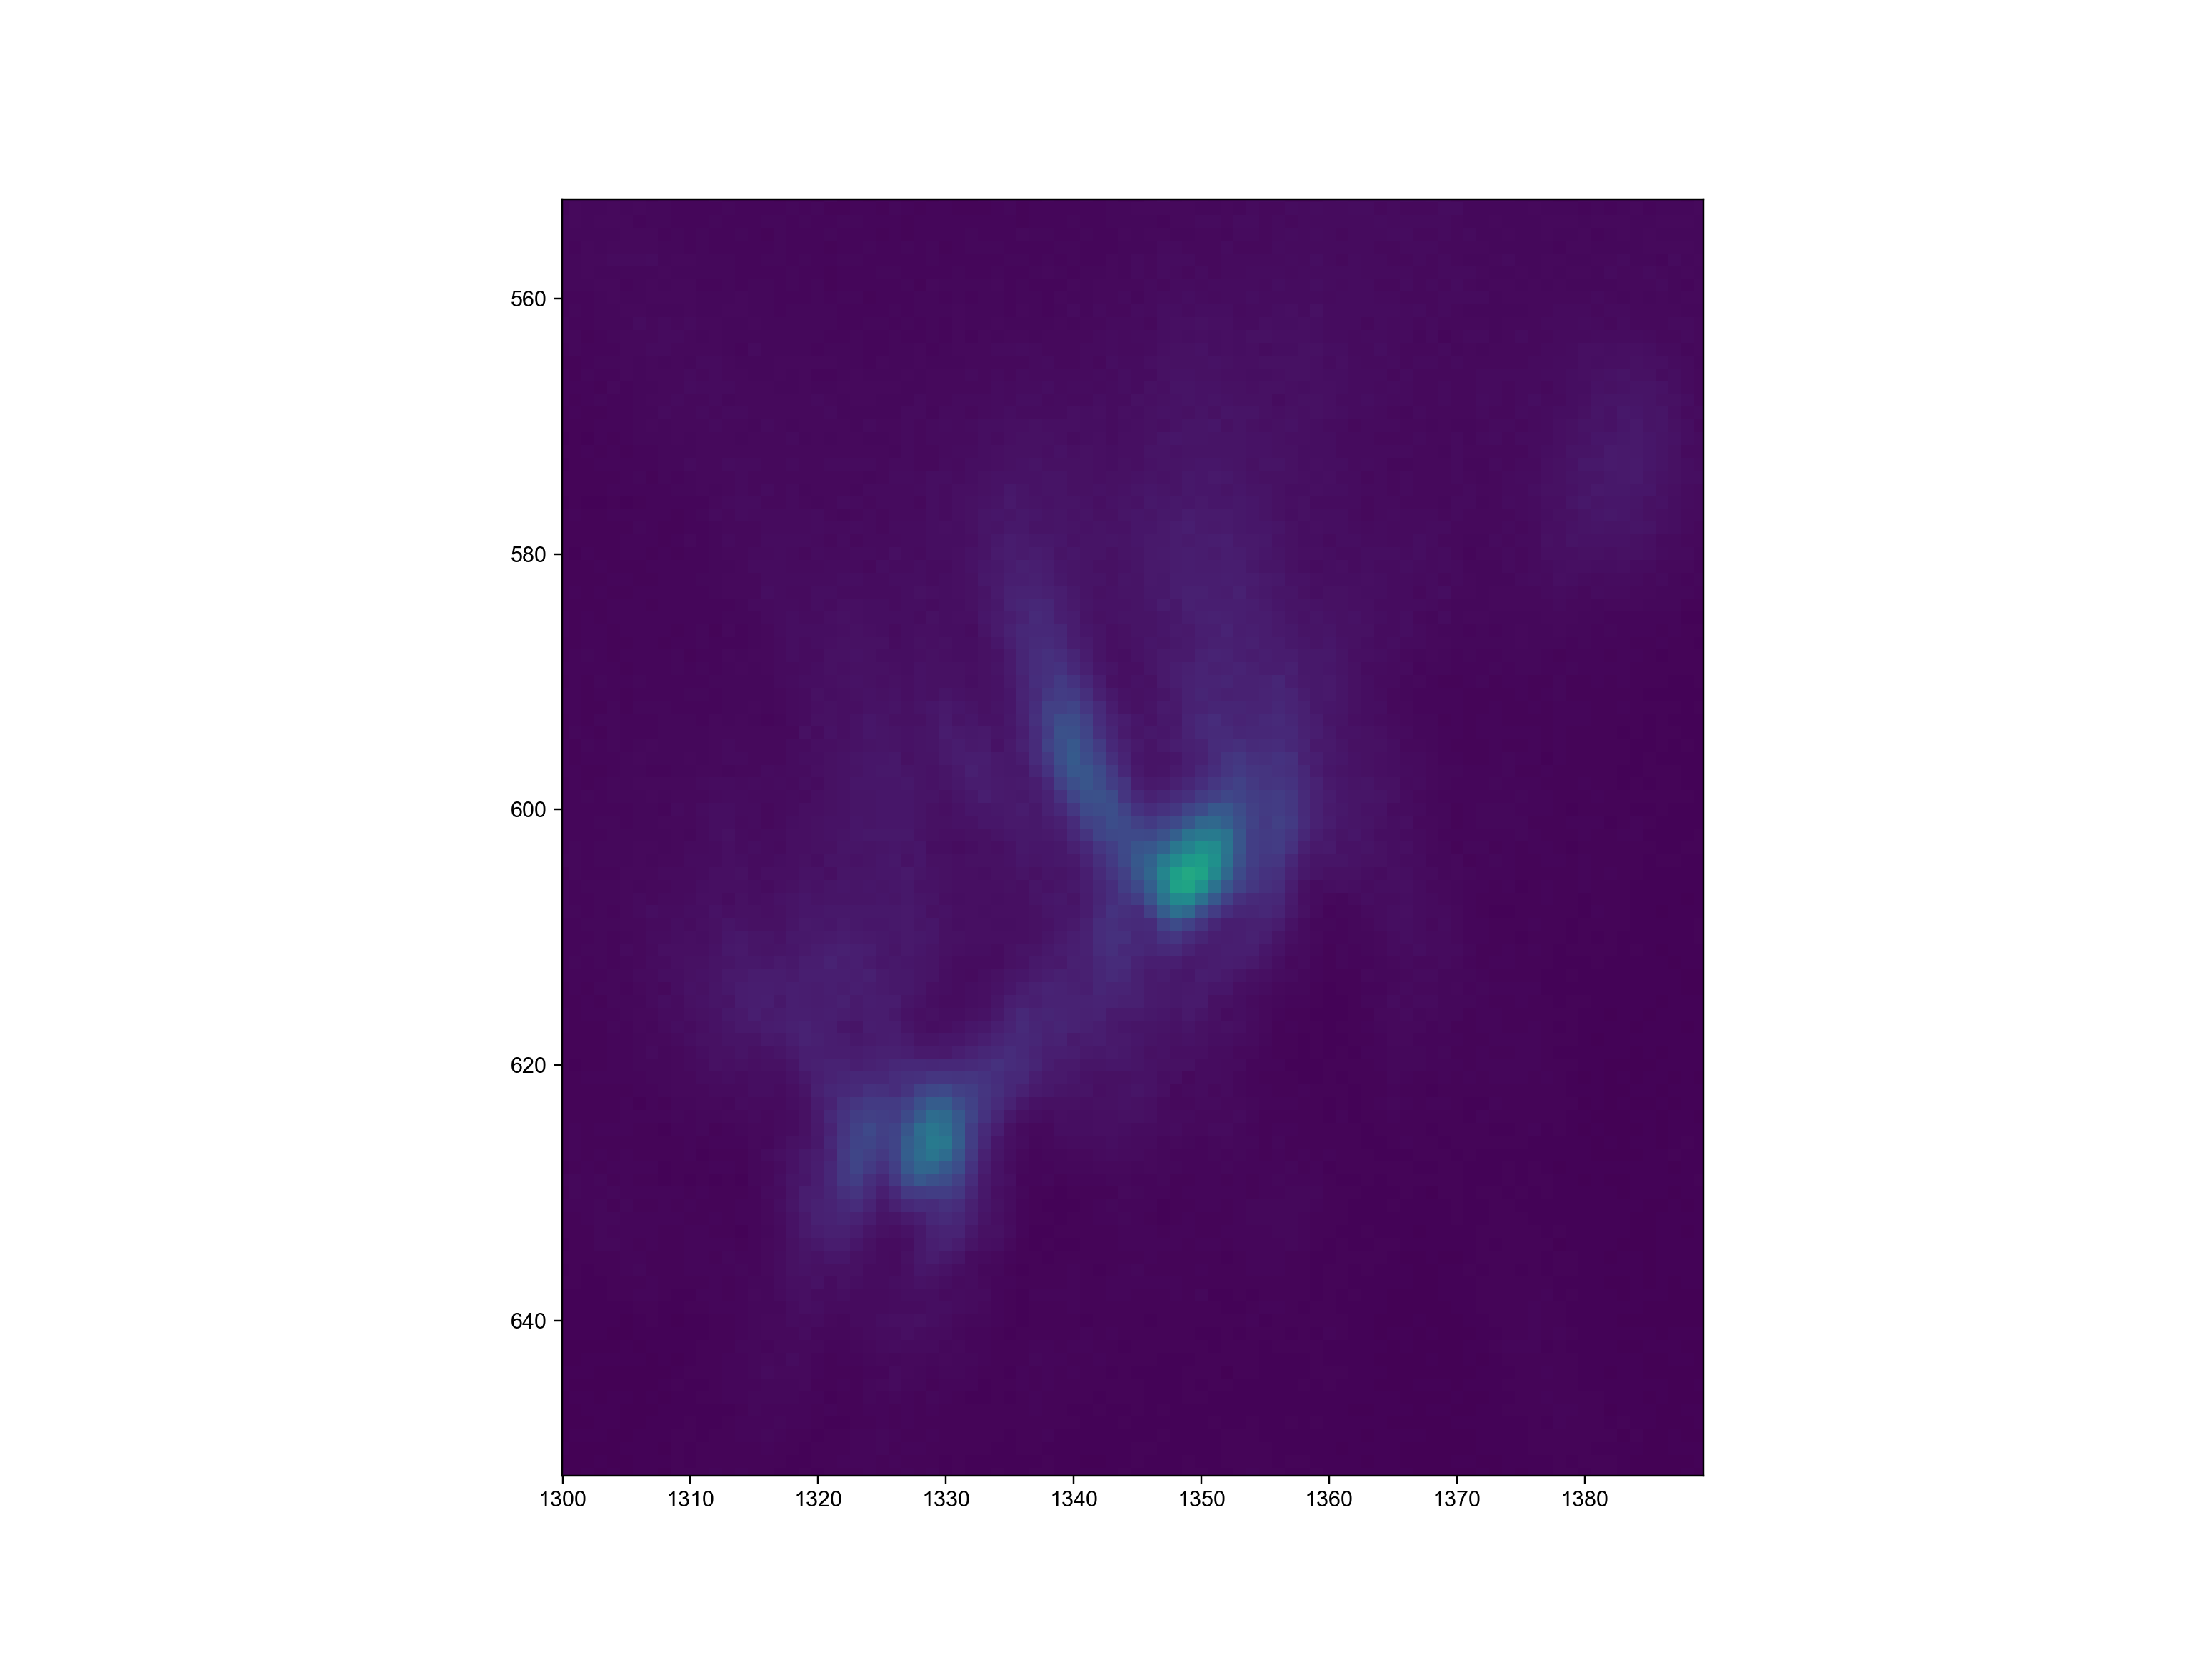

In [115]:
plt.figure()
plt.imshow(raw_ims[0][200])

<IPython.core.display.Javascript object>


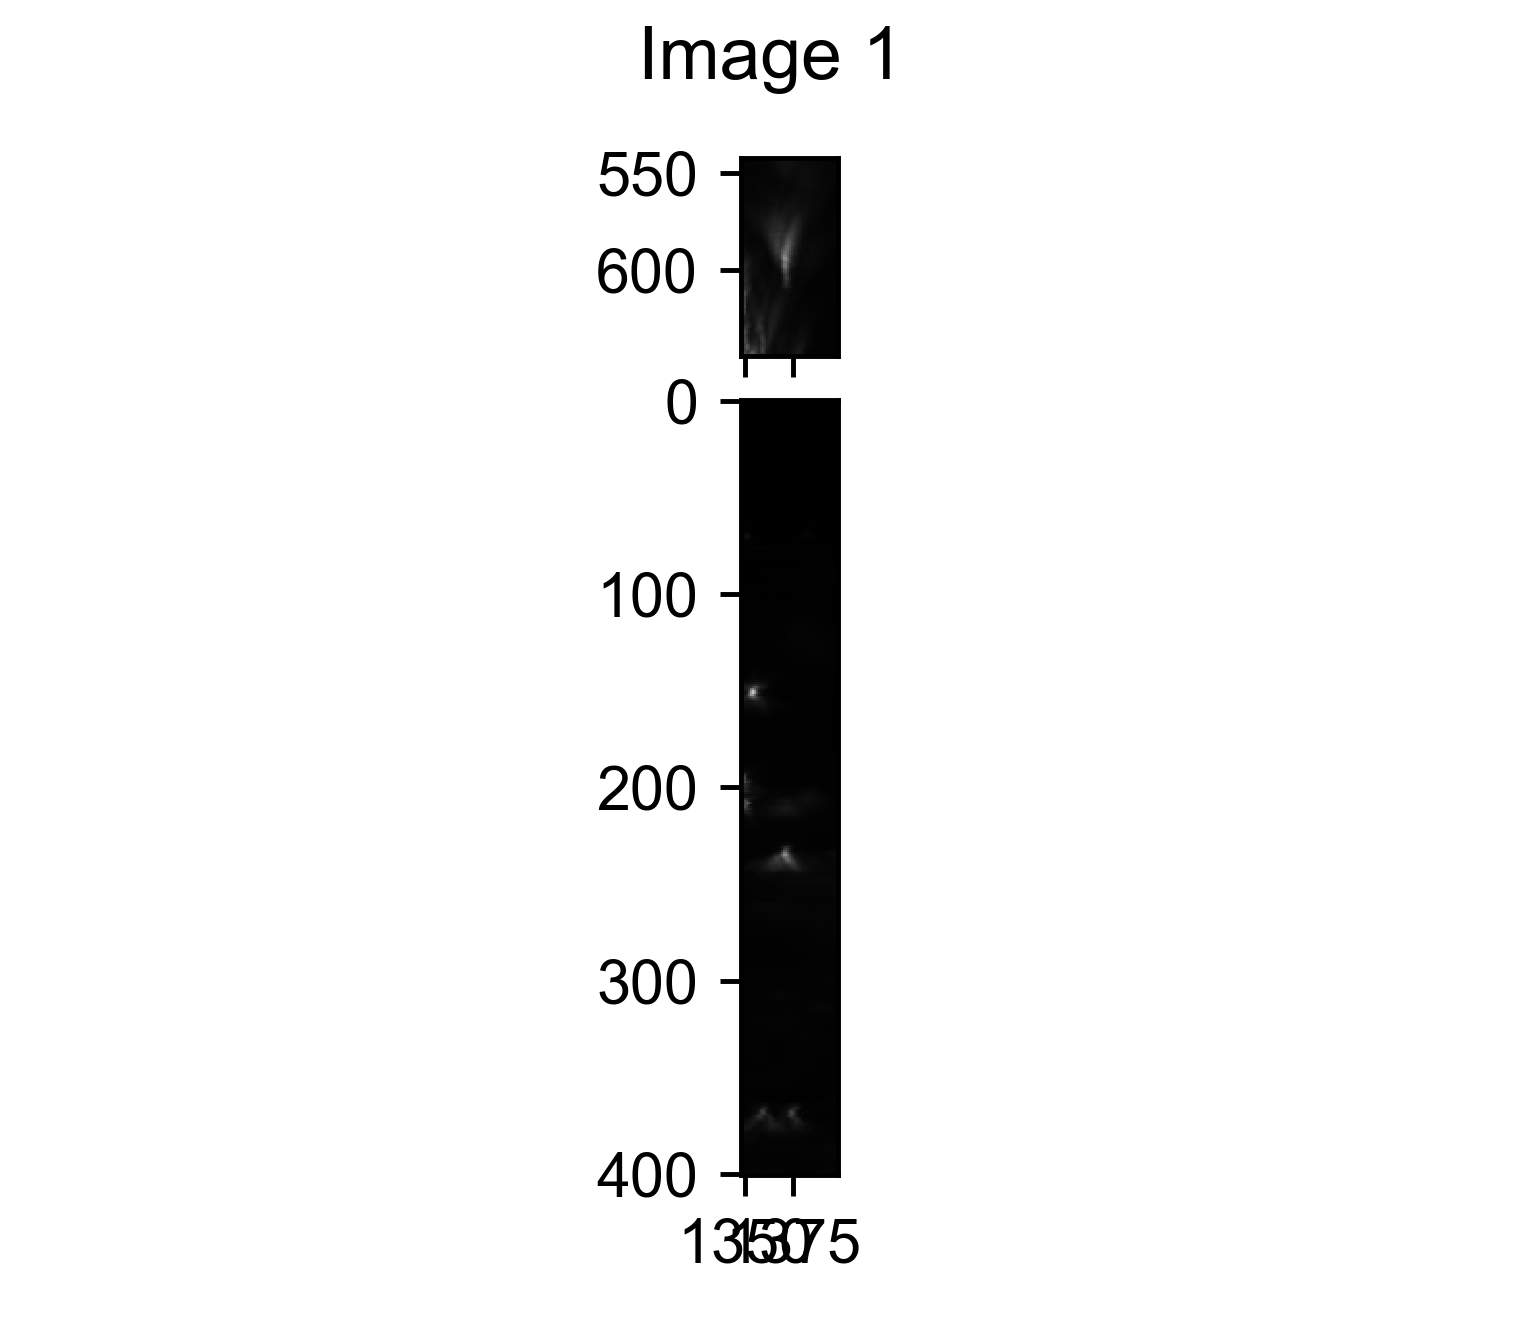

In [113]:
fig = plt.figure(figsize=(3.5,3), dpi=200)
visual_tools.imshow_mark_3d_v2(raw_ims, fig=fig)
plt.show()

In [97]:
reload(visual_tools)

<module 'ImageAnalysis3.visual_tools' from 'E:\\Users\\puzheng\\Documents\\ImageAnalysis3\\visual_tools.py'>

<IPython.core.display.Javascript object>


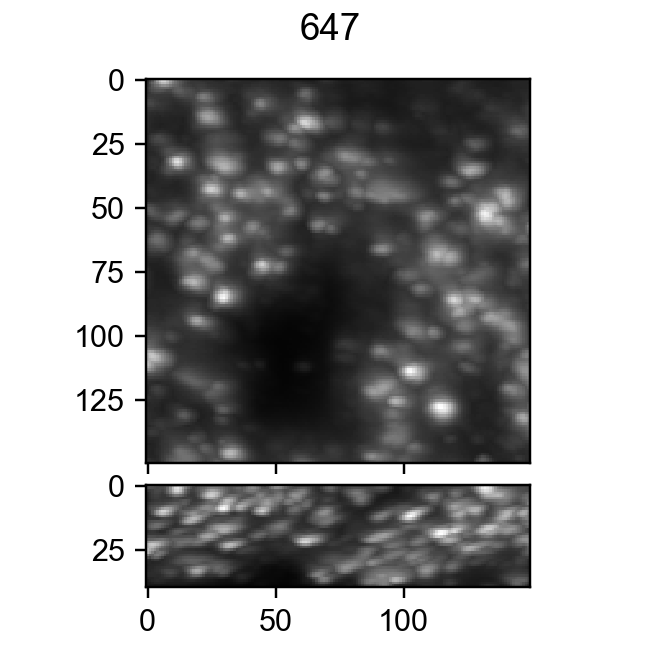

In [103]:
fig = plt.figure(figsize=(3,3), dpi=200)
visual_tools.imshow_mark_3d_v2([_im[40:80, 1150:1300, 850:1000] for _im in deskewed_ims], fig=fig, image_names=image_channel)


# side to side comparison from STORM6

In [110]:
import h5py
hdf5_filename = r'\\franklin\SSD_01\Pu_Temp\20210729-Thymus_CTP10-Aire_DNA\Conv_zscan_05.hdf5'
with h5py.File(hdf5_filename, "r", libver='latest') as _f:
    _grp = _f['combo']
    combo_ims = _grp['ims'][4:6]
    combo_ids = _grp['ids'][4:6]

<IPython.core.display.Javascript object>


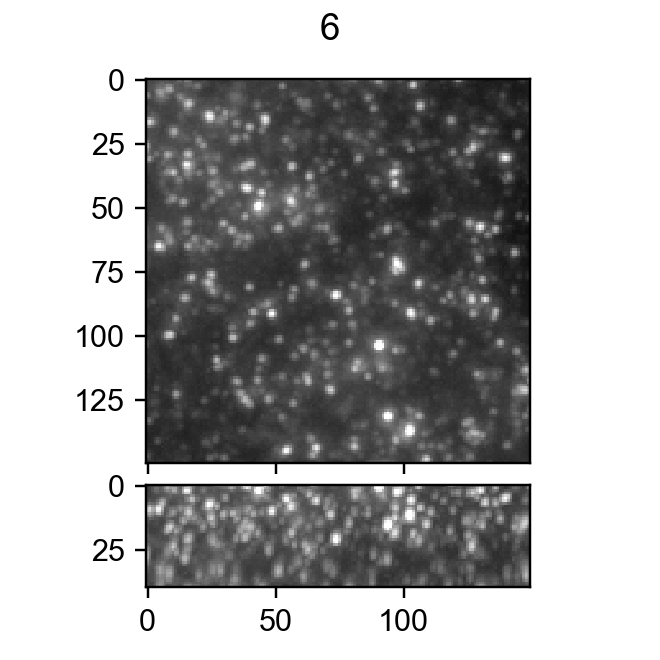

In [112]:
fig = plt.figure(figsize=(3,3), dpi=200)
visual_tools.imshow_mark_3d_v2([_im[10:50, 1150:1300, 850:1000] for _im in combo_ims], 
                               fig=fig, image_names=combo_ids)


In [47]:
import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

12688


<IPython.core.display.Javascript object>


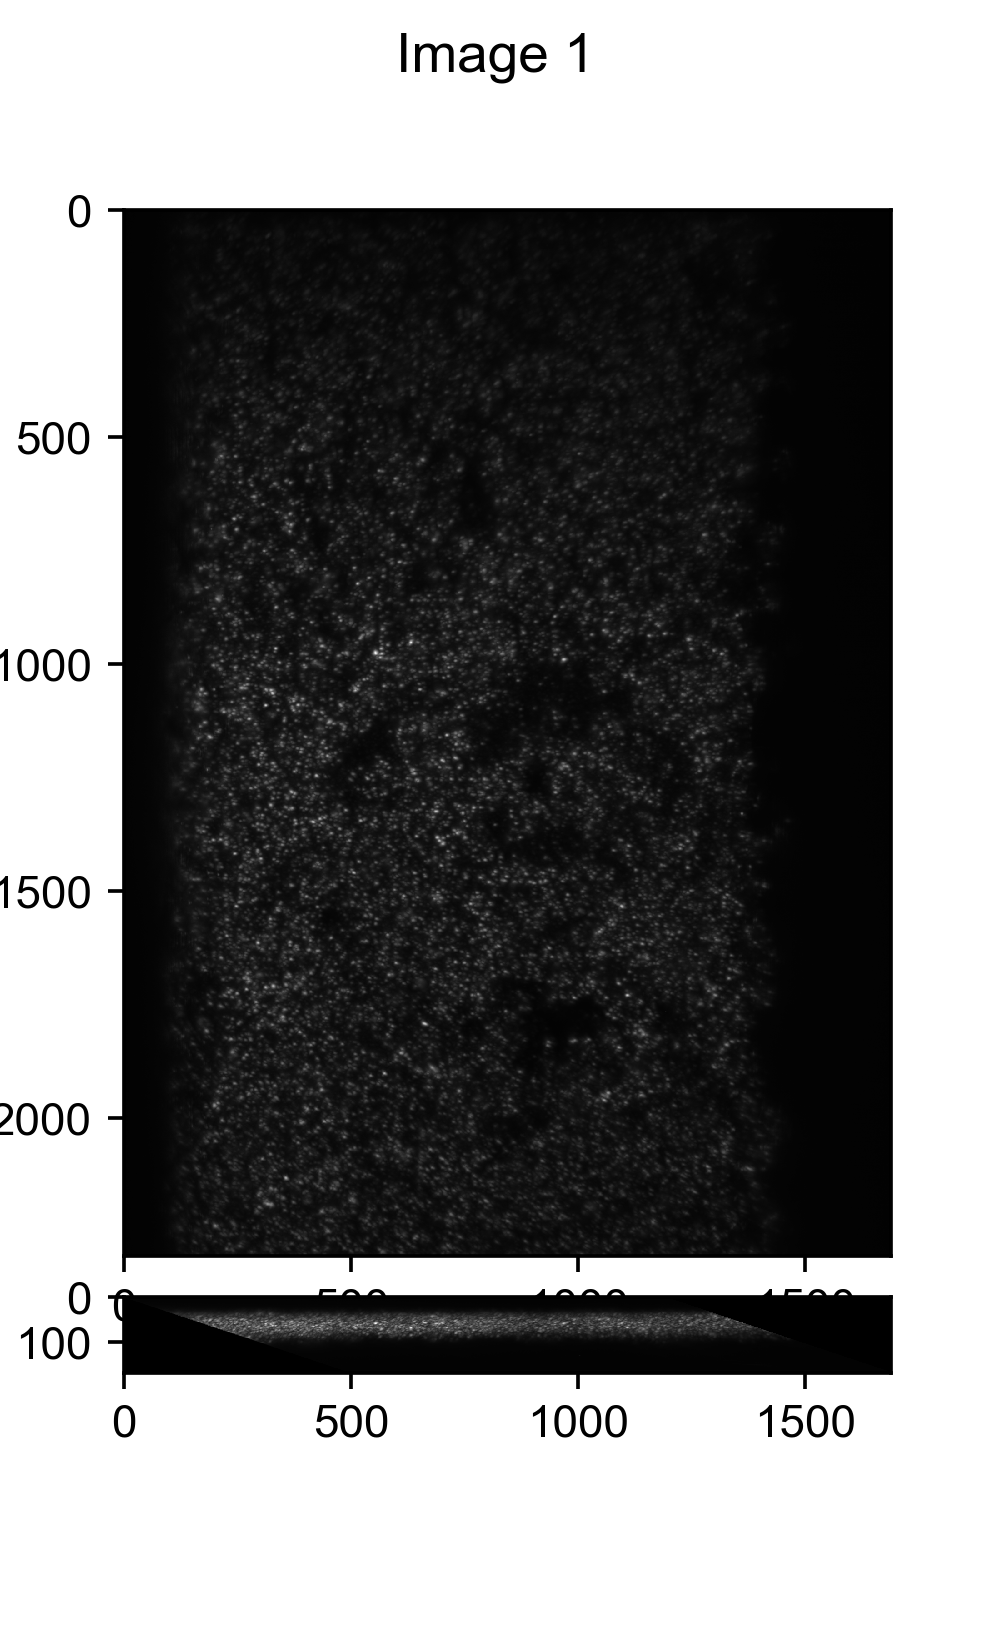

In [68]:
fig = plt.figure(figsize=(3,5), dpi=300)
visual_tools.imshow_mark_3d_v2([test], fig=fig)
plt.show()

<IPython.core.display.Javascript object>


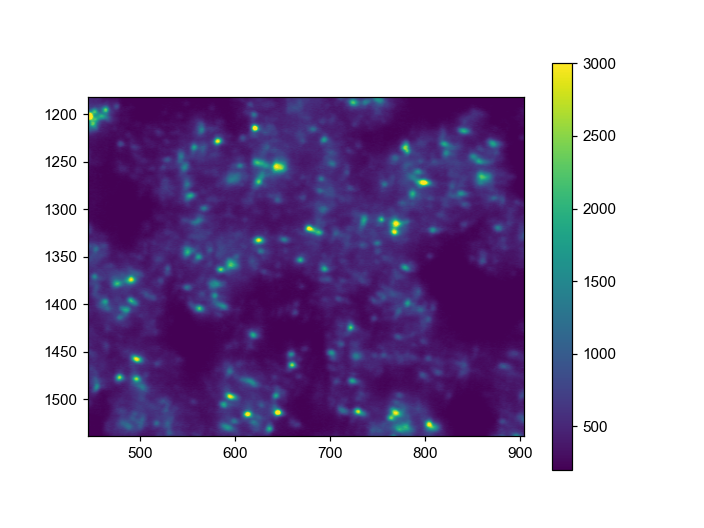

In [50]:
plt.figure()
plt.imshow(stack[70], vmin=200, vmax=3000)
plt.colorbar()
plt.show()